In [3]:
import baccoemu
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import os
import scipy
import warnings

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
import plotter
import utils
import run_inference as rinf
import moment_network as mn

%load_ext autoreload
%autoreload 2

2024-12-02 17:06:50.220639: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 17:06:50.453110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 17:06:50.453152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 17:06:50.476233: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 17:06:50.551767: I tensorflow/core/platform/cpu_feature_guar

In [4]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

### Results

In [11]:
### Load data
data_mode = 'muchisimocksPk'

tag_mocks_train = '_p5_n10000'
tag_pk_train = '_b1000'

tag_mocks = '_fixedcosmo'
tag_pk = '_b1000'
mode_bias_vector = 'single'
#tag_pk = '_biaszen_p4_n10000'
#mode_bias_vector = 'LH'
tag_datagen = f'{tag_mocks_train}{tag_pk_train}'
tag_data = '_'+data_mode + tag_datagen


In [25]:
param_dict, Pk, gaussian_error_pk, k, bias_vector = rinf.load_data_muchisimocksPk_fixedcosmo(tag_mocks,
                                        tag_pk,
                                        mode_bias_vector=mode_bias_vector
                                        )
print(y.shape)

1000/1000 have at least one non-positive Pk value
Masking columns [29]
(1000, 29)


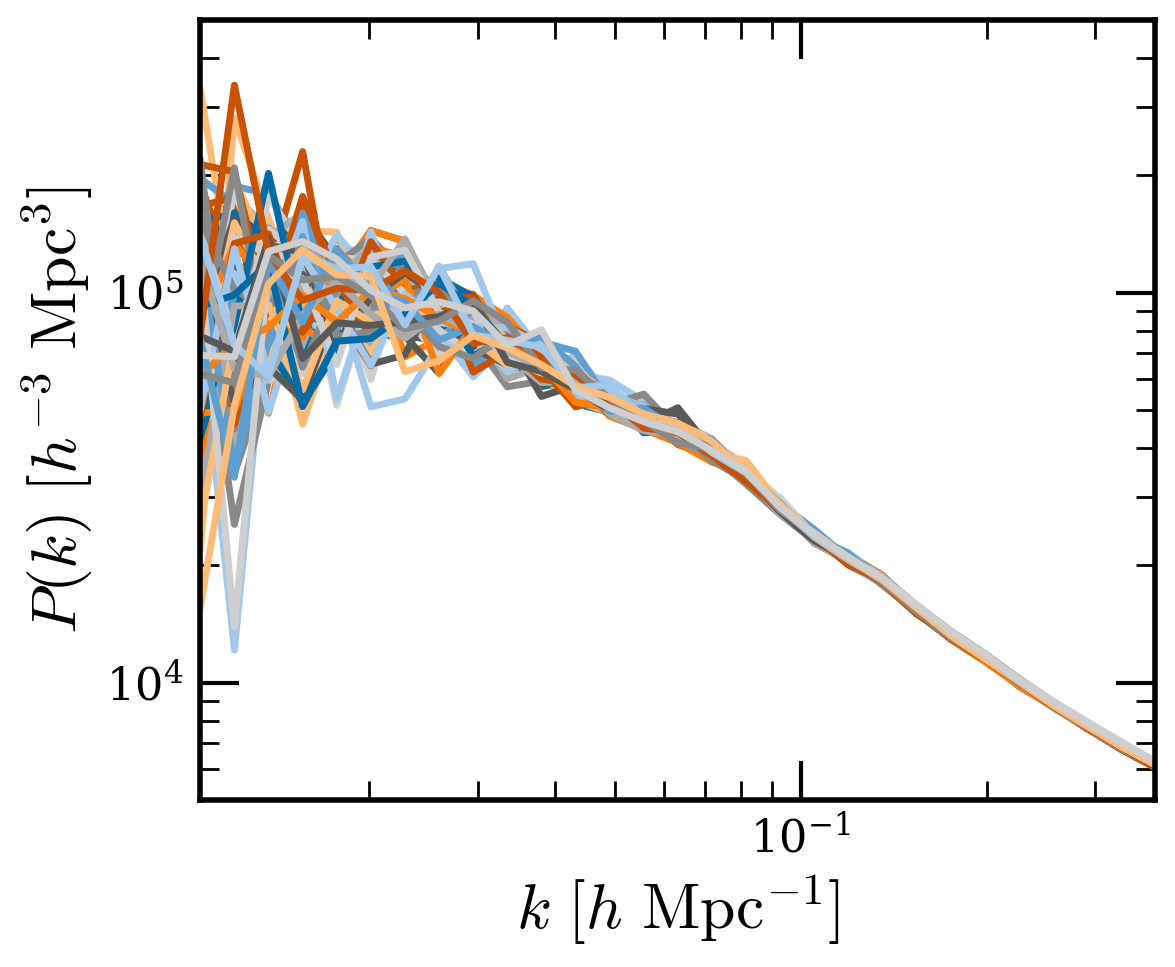

In [27]:
n_plot = 100
fig, ax = mpl.pyplot.subplots(figsize=(6, 5))
for iLH in range(n_plot):
    ax.loglog(k, y[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))
ax.set_ylim(5e3, 5e5)
mpl.pyplot.tight_layout()
mpl.pyplot.show()

In [22]:
dir_params = '../data/params'
fn_params = f'{dir_params}/params_lh{tag_mocks_train}.txt'
params_df = pd.read_csv(fn_params, index_col=0)

param_names = params_df.columns.tolist()

theta_single = [param_dict[param_name] for param_name in param_names]

theta_test = np.array([theta_single]*Pk.shape[0])


In [9]:
param_labels = [utils.param_label_dict[param_name] for param_name in param_names]

In [29]:
print(param_names)
print(theta_single)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns']
[0.3175, 0.834, 0.6711, 0.049, 0.9624]


In [10]:
# only need for bounds, TODO save bounds somwehere
dir_emus_lbias = '/home/kstoreyf/external'
emu, emu_bounds, emu_param_names = utils.load_emu(dir_emus_lbias=dir_emus_lbias)
dict_bounds = {name: emu_bounds[emu_param_names.index(name)] for name in param_names}

Loading l-bias lpt emulator...


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using ver

Nonlinear l-bias emulator loaded in memory.


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Results for specific model

In [14]:
n_train = 8000

tag_run = ''

run_mode_mean = 'load'
tag_run += '_best-rand10'
sweep_name_mean = None

run_mode_cov = 'load'
tag_run += '_bestcov-rand10'
sweep_name_cov = None
        
tag_inf = f'{tag_data}_ntrain{n_train}_direct{tag_run}'
dir_mn = f'../results/results_moment_network/mn{tag_inf}'
print(tag_inf)

_muchisimocksPk_p5_n10000_b1000_ntrain8000_direct_best-rand10_bestcov-rand10


In [31]:
tag_test = tag_mocks
theta_test_pred = np.load(f'{dir_mn}/theta_test{tag_test}_pred.npy')
covs_test_pred = np.load(f'{dir_mn}/covs_test{tag_test}_pred.npy')
print(theta_test_pred.shape, covs_test_pred.shape)

(1000, 5) (1000, 5, 5)


In [32]:
print(theta_test_pred)

[[0.29469818 0.8420947  0.7177234  0.05324647 0.9784163 ]
 [0.29469782 0.8420935  0.71772224 0.05324646 0.97841585]
 [0.30733037 0.83509845 0.70196956 0.05262564 0.9723098 ]
 ...
 [0.31583384 0.8365914  0.69688356 0.04886363 0.9597409 ]
 [0.31958893 0.83331895 0.70129246 0.05112786 0.966171  ]
 [0.30996302 0.8346447  0.6976115  0.05087357 0.9666809 ]]


In [41]:
tag_test = f'{tag_mocks}_mean'
theta_test_mean_pred = np.load(f'{dir_mn}/theta_test{tag_test}_pred.npy')
covs_test_mean_pred = np.load(f'{dir_mn}/covs_test{tag_test}_pred.npy')
print(theta_test_mean_pred.shape, covs_test_mean_pred.shape)

(1, 5) (1, 5, 5)


In [42]:
theta_test_mean_pred

array([[0.3151871 , 0.83681583, 0.69313914, 0.05069249, 0.96462107]],
      dtype=float32)

In [33]:
# covs_test = np.load(f'{dir_mn}/covs_test{tag_test}.npy')
# print(covs_test.shape)

In [34]:
# for i in range(covs_test.shape[1]):
#     for j in range(covs_test.shape[2]):
#         if i!=j:
#             continue
#         plt.figure(figsize=(3,3))
#         plt.scatter(covs_test[:,i,j], covs_test_pred[:,i,j], color='k', s=1)
#         plt.xlim(min(np.min(covs_test[:,i,j]), np.min(covs_test_pred[:,i,j])),
#                 max(np.max(covs_test[:,i,j]), np.max(covs_test_pred[:,i,j])))
#         plt.ylim(min(np.min(covs_test[:,i,j]), np.min(covs_test_pred[:,i,j])),
#                 max(np.max(covs_test[:,i,j]), np.max(covs_test_pred[:,i,j])))



In [35]:
# moment_network = mn.MomentNetwork(tag_mn=tag_inf)
# moment_network.load_model_mean()
history_mean = np.load(f'{dir_mn}/model_mean_history.npy', allow_pickle=True).item()
history_cov = np.load(f'{dir_mn}/model_cov_history.npy', allow_pickle=True).item()

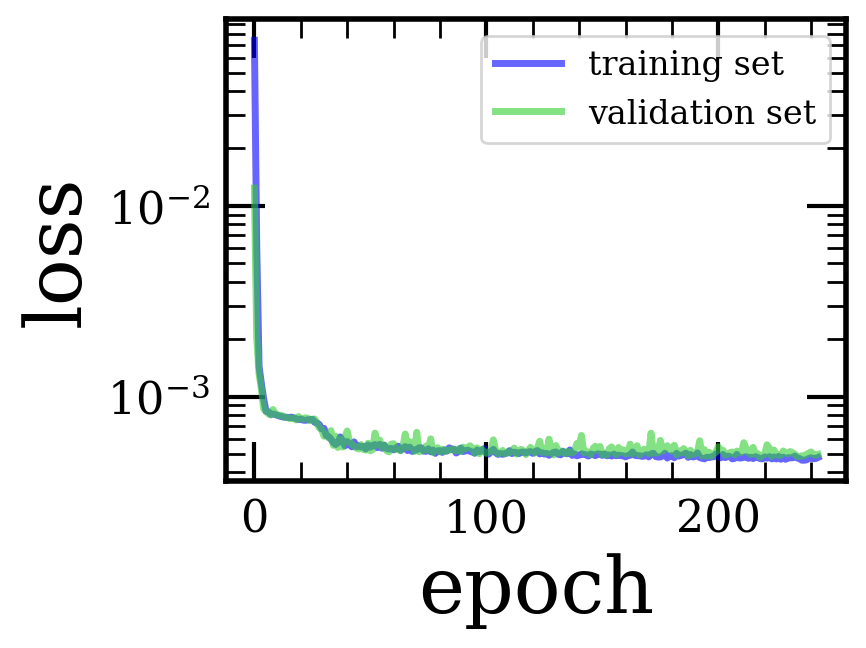

In [36]:
plotter.plot_loss(history_mean)

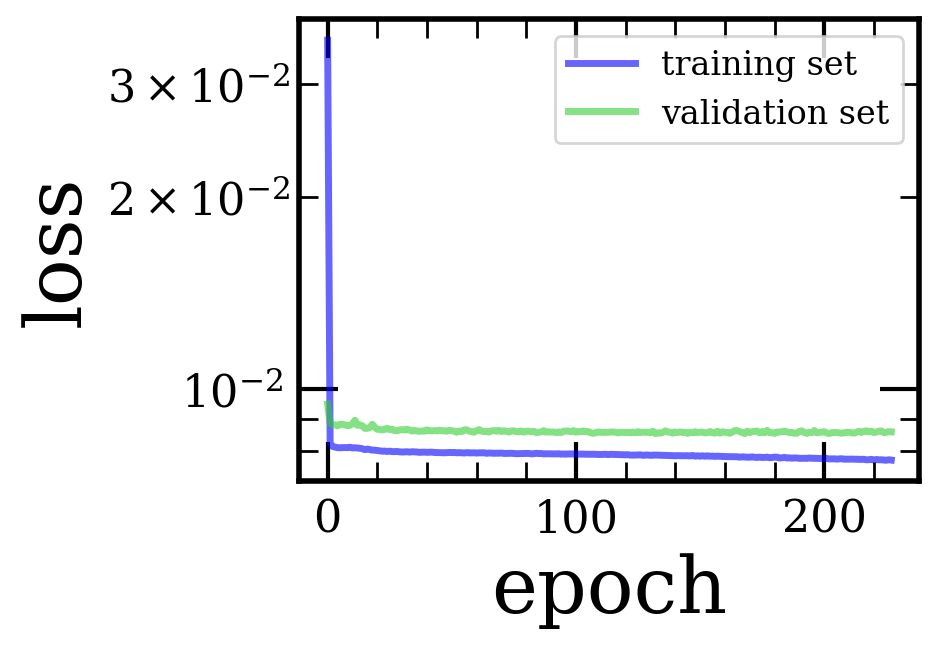

In [37]:
plotter.plot_loss(history_cov)

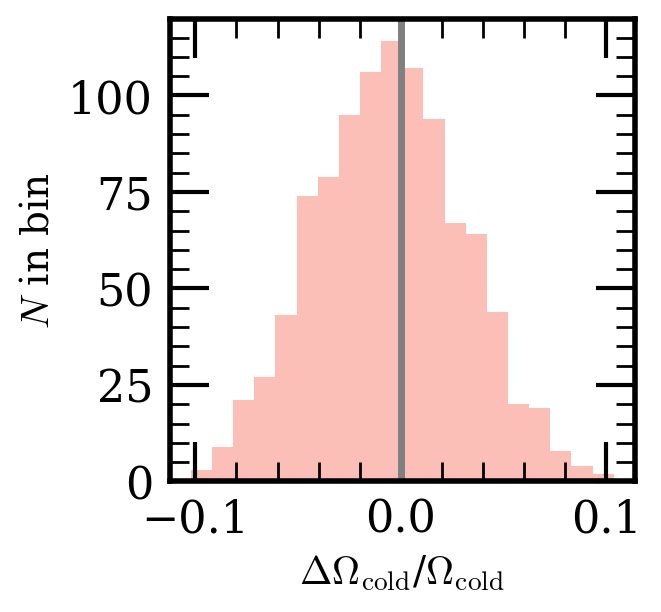

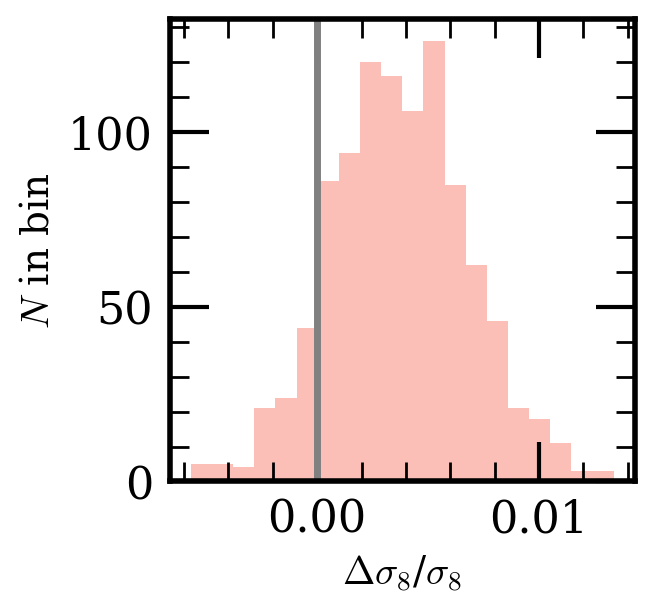

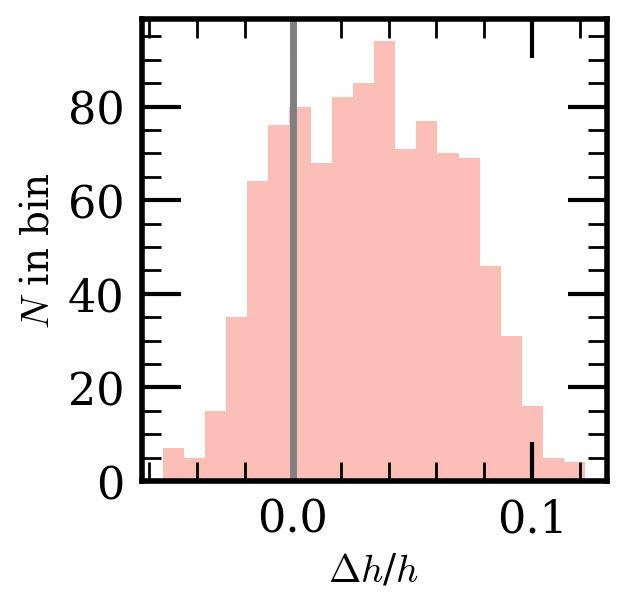

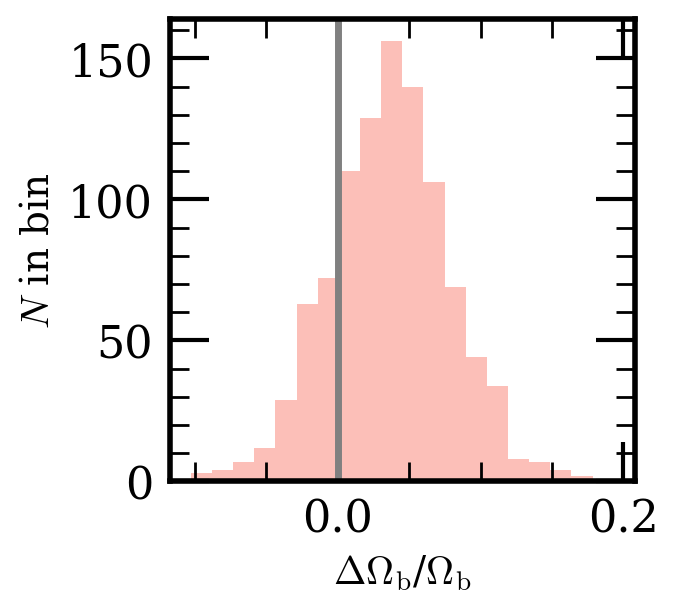

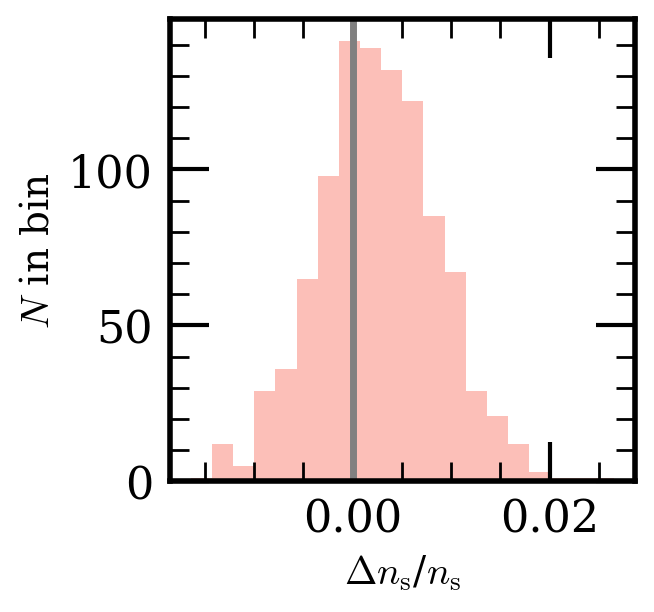

In [38]:

fracdiffs = (theta_test_pred - theta_test)/theta_test
plotter.plot_hists_mean(fracdiffs, param_labels)


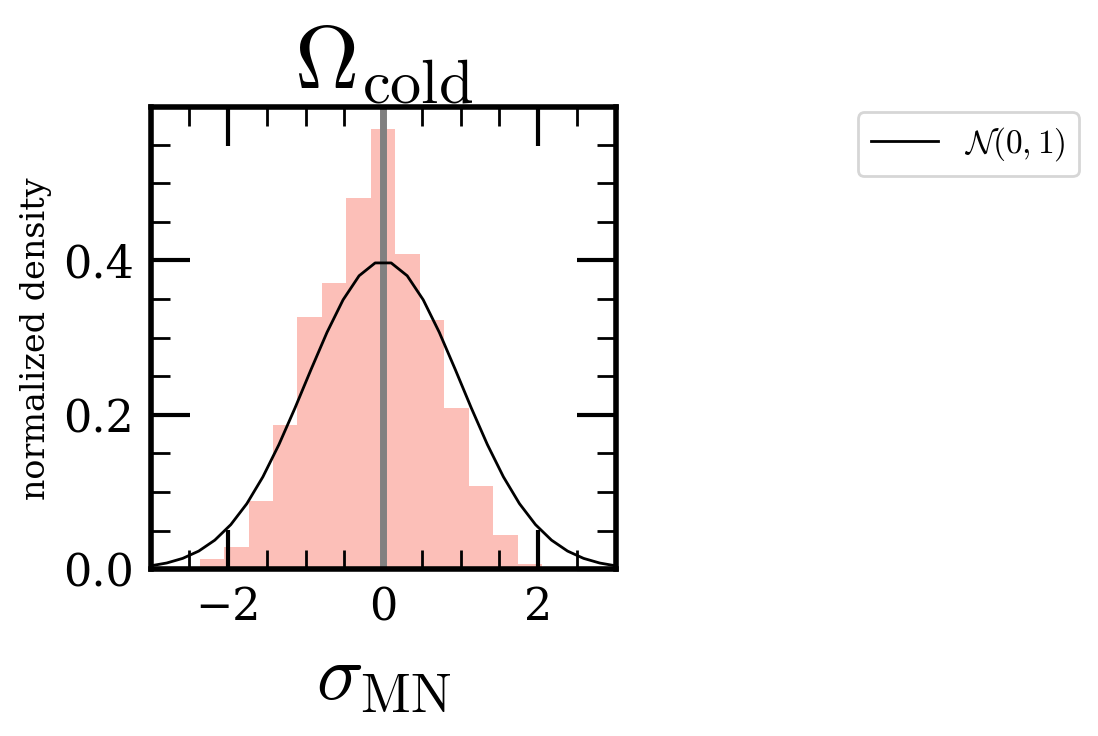

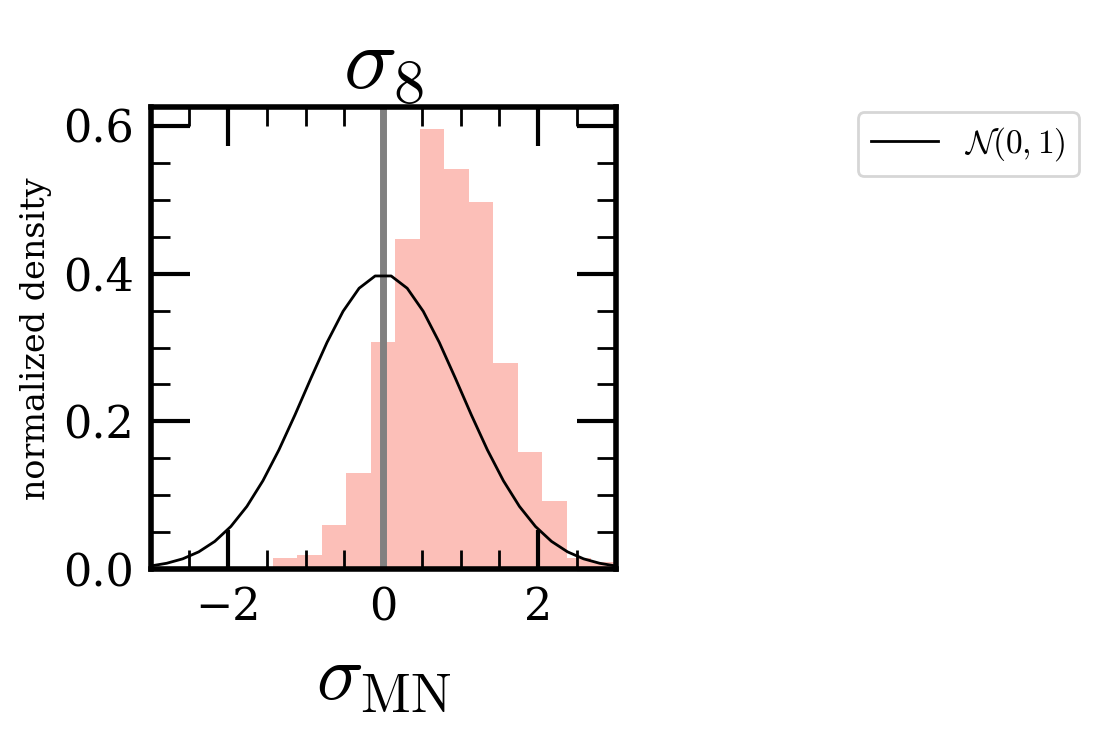

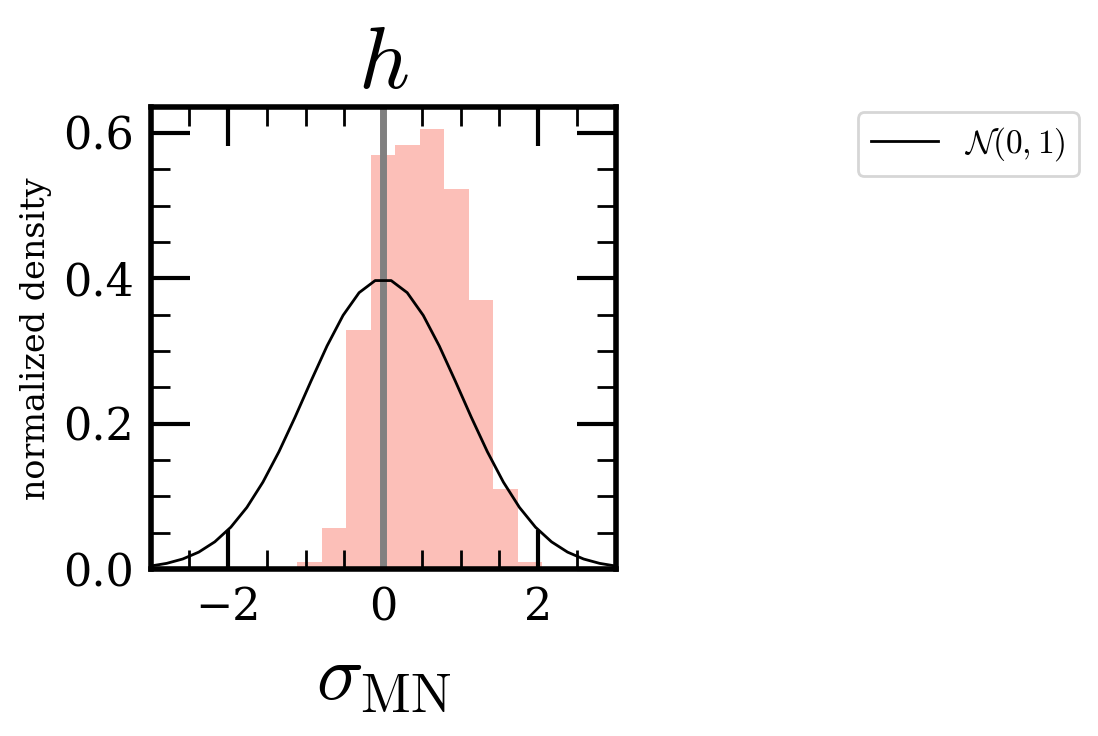

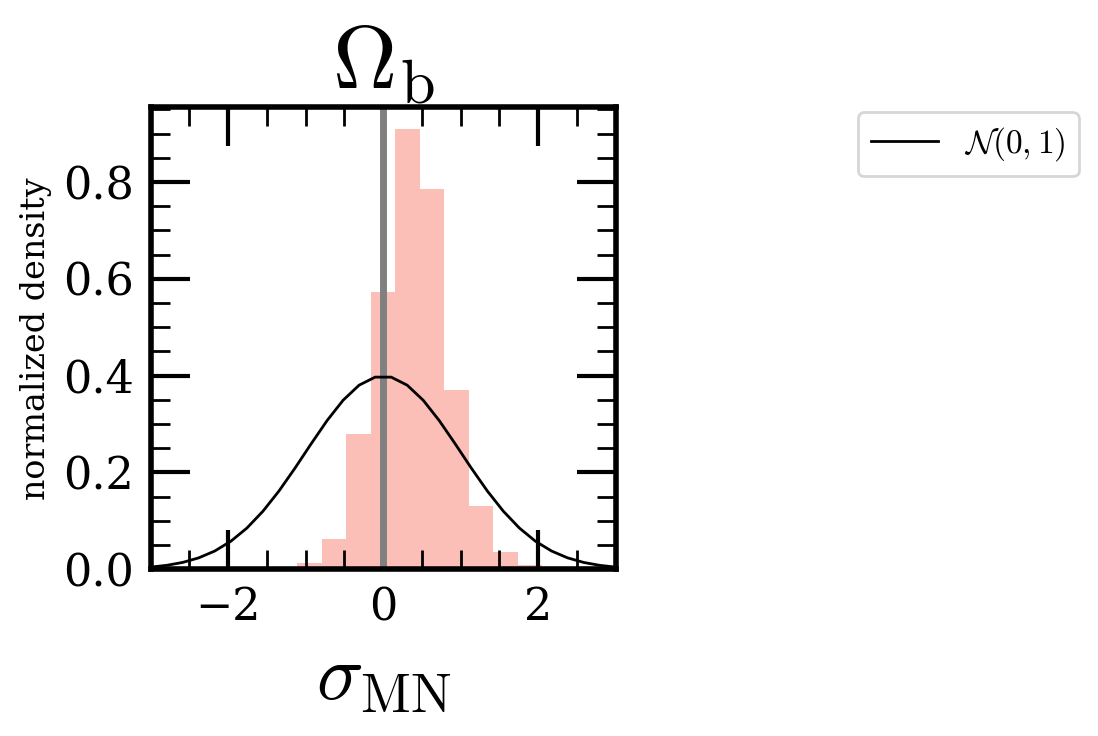

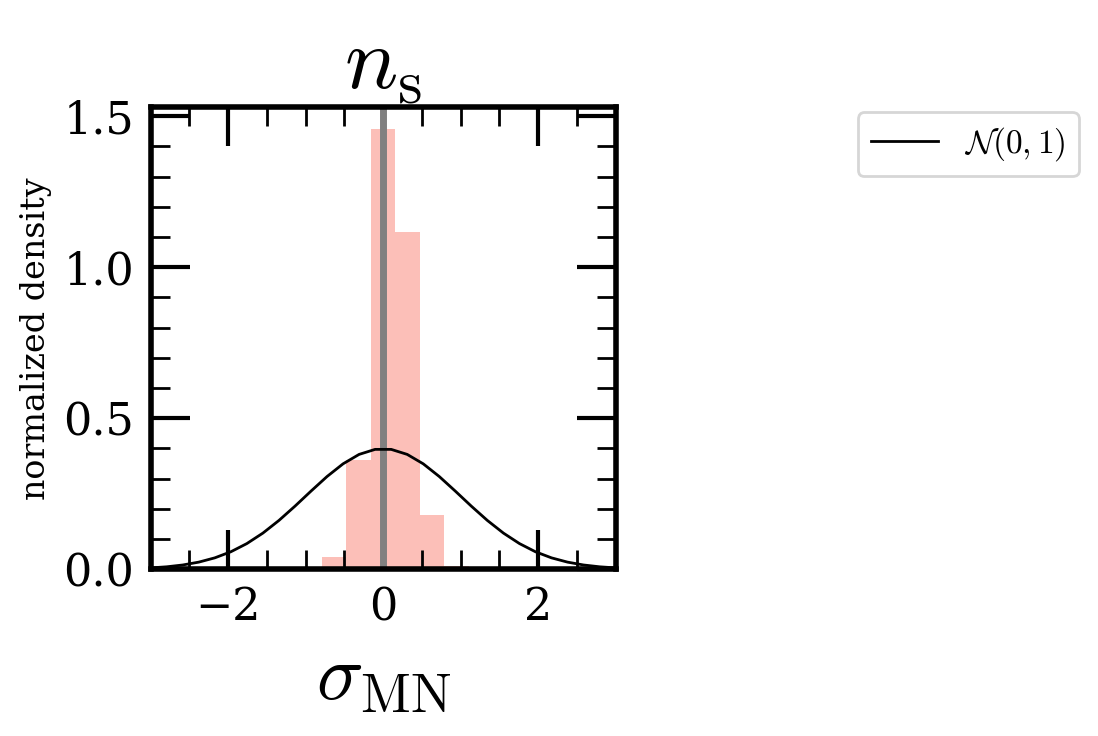

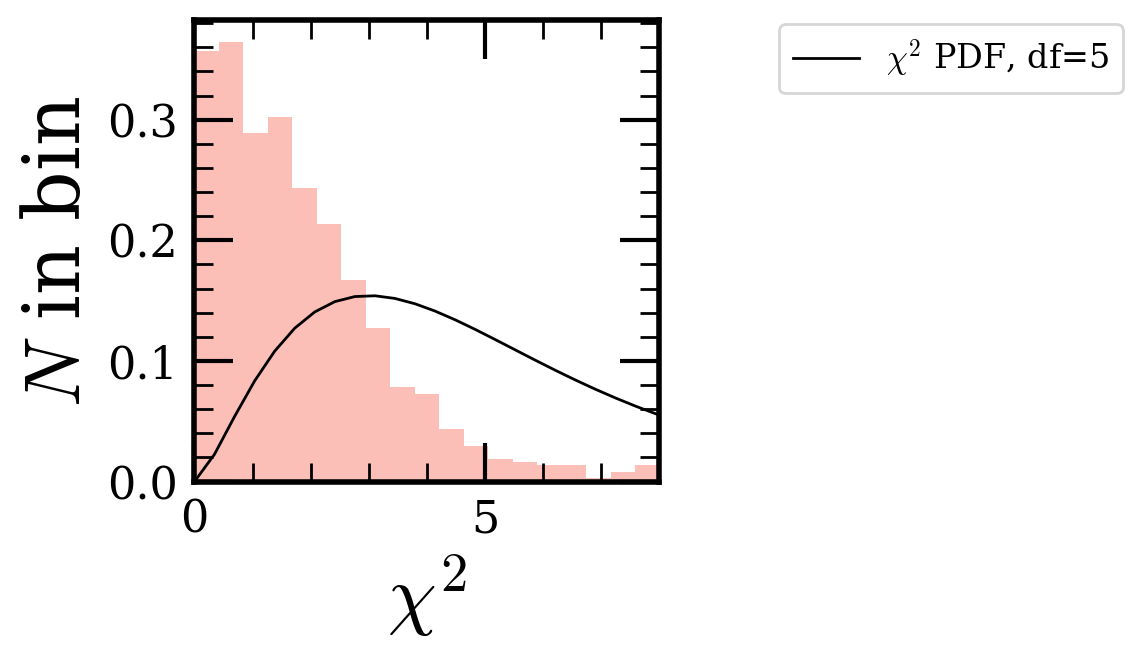

In [39]:
plotter.plot_hists_cov(theta_test, theta_test_pred, covs_test_pred, param_labels)

Covariance matrix not PSD! (sampling anyway)


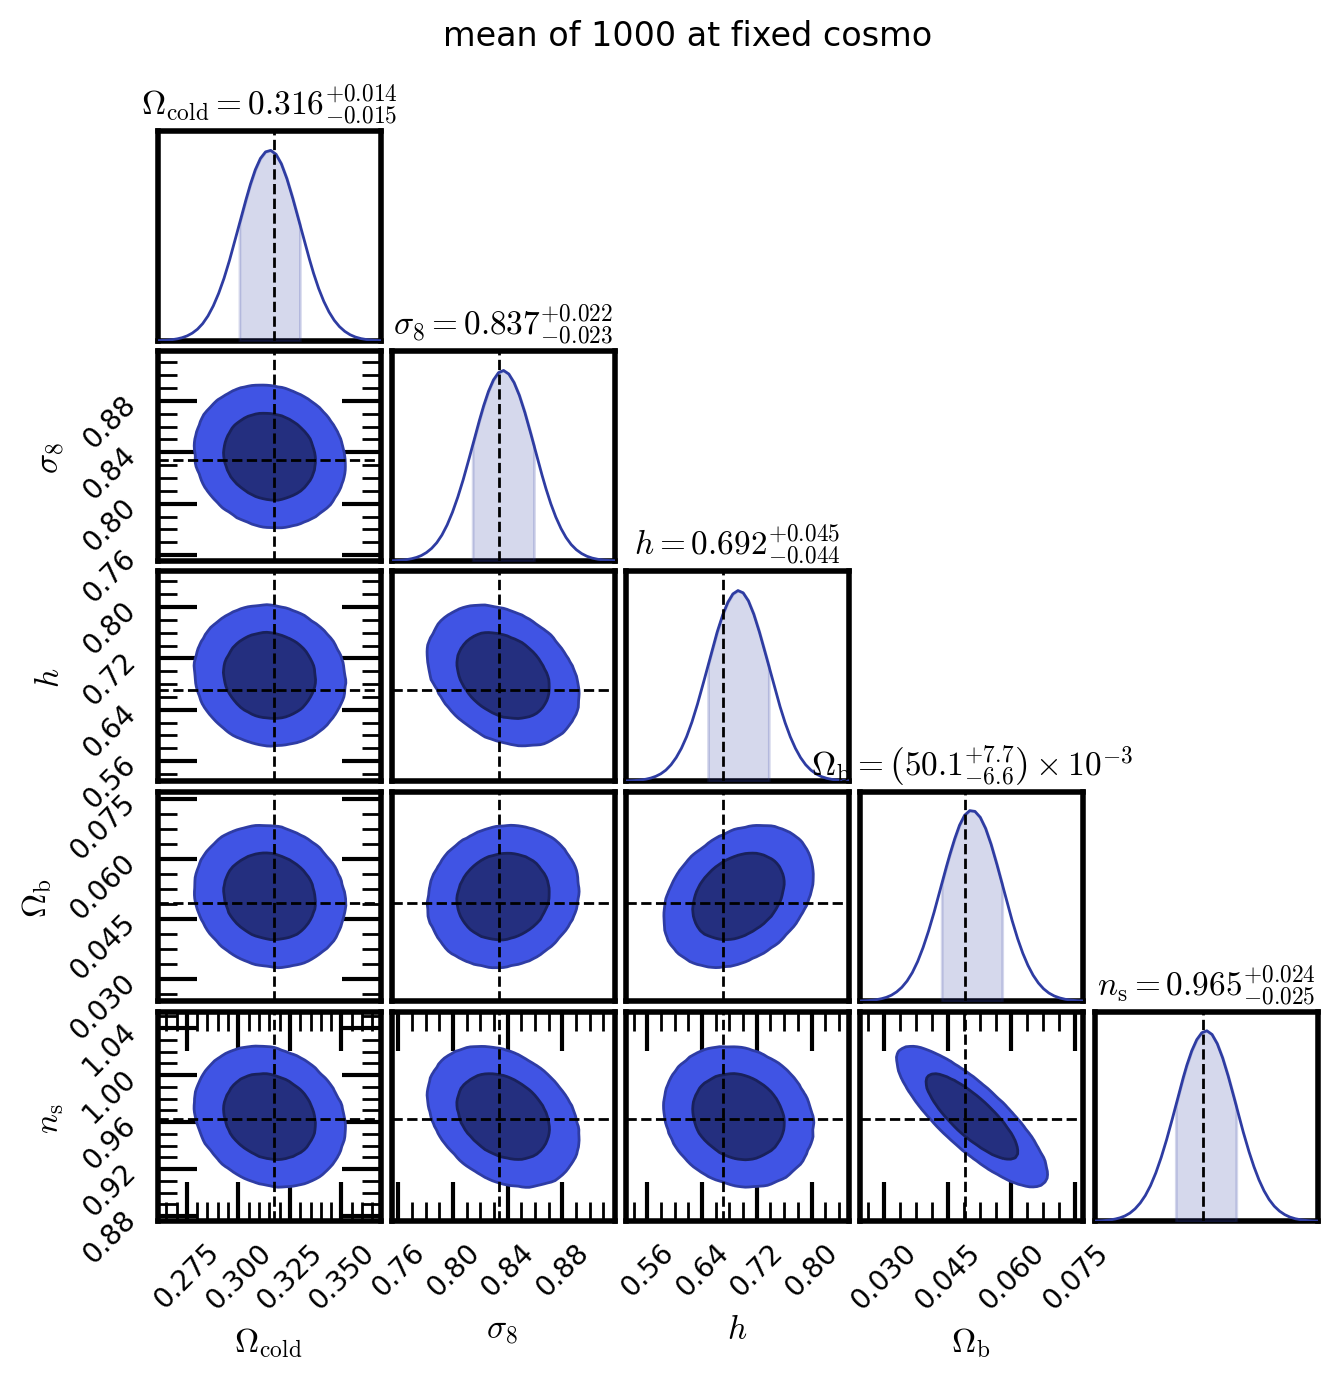

In [45]:
inf_methods = ['mn']
labels_extra = ['']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#2E3CA2']

idx_obs = 0
plotter.plot_contours_inf(param_names, idx_obs, theta_single, 
                        inf_methods, [tag_inf], tag_test='_fixedcosmo_mean',
                        colors=colors, labels_extra=labels_extra,
                        title='mean of 1000 at fixed cosmo')



Covariance matrix not PSD! (sampling anyway)
Covariance matrix not PSD! (sampling anyway)
Covariance matrix not PSD! (sampling anyway)


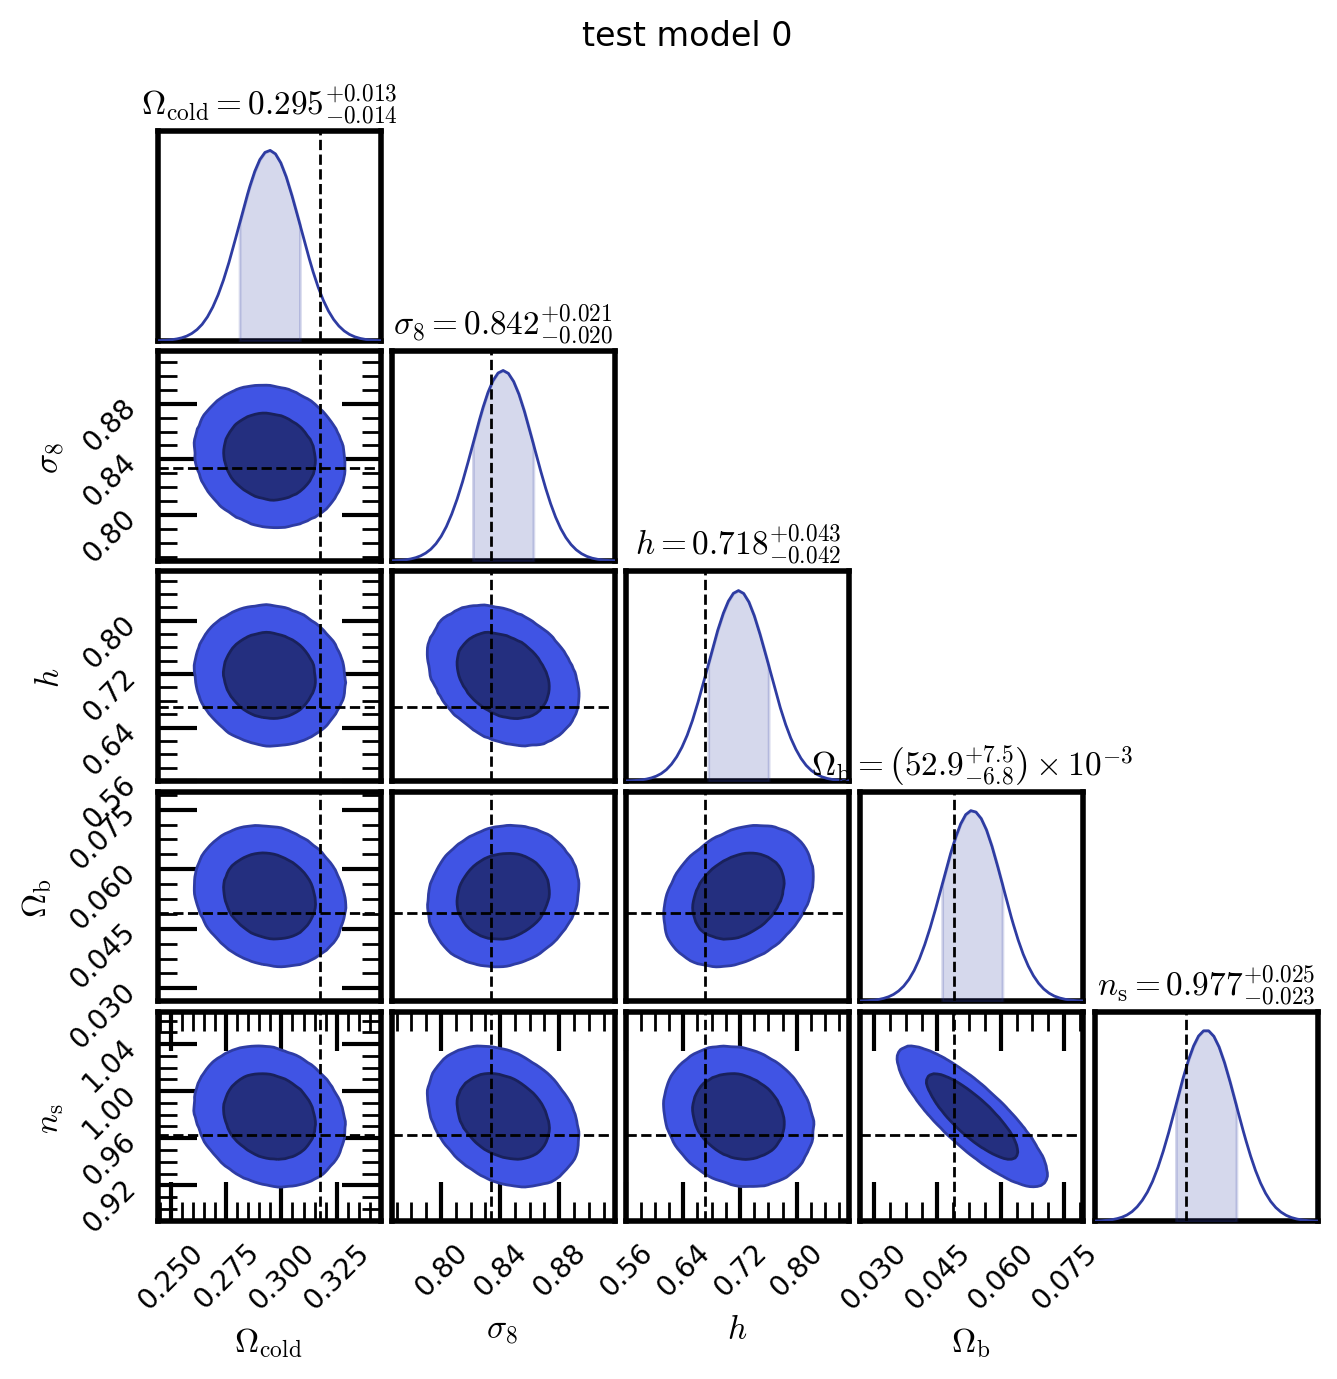

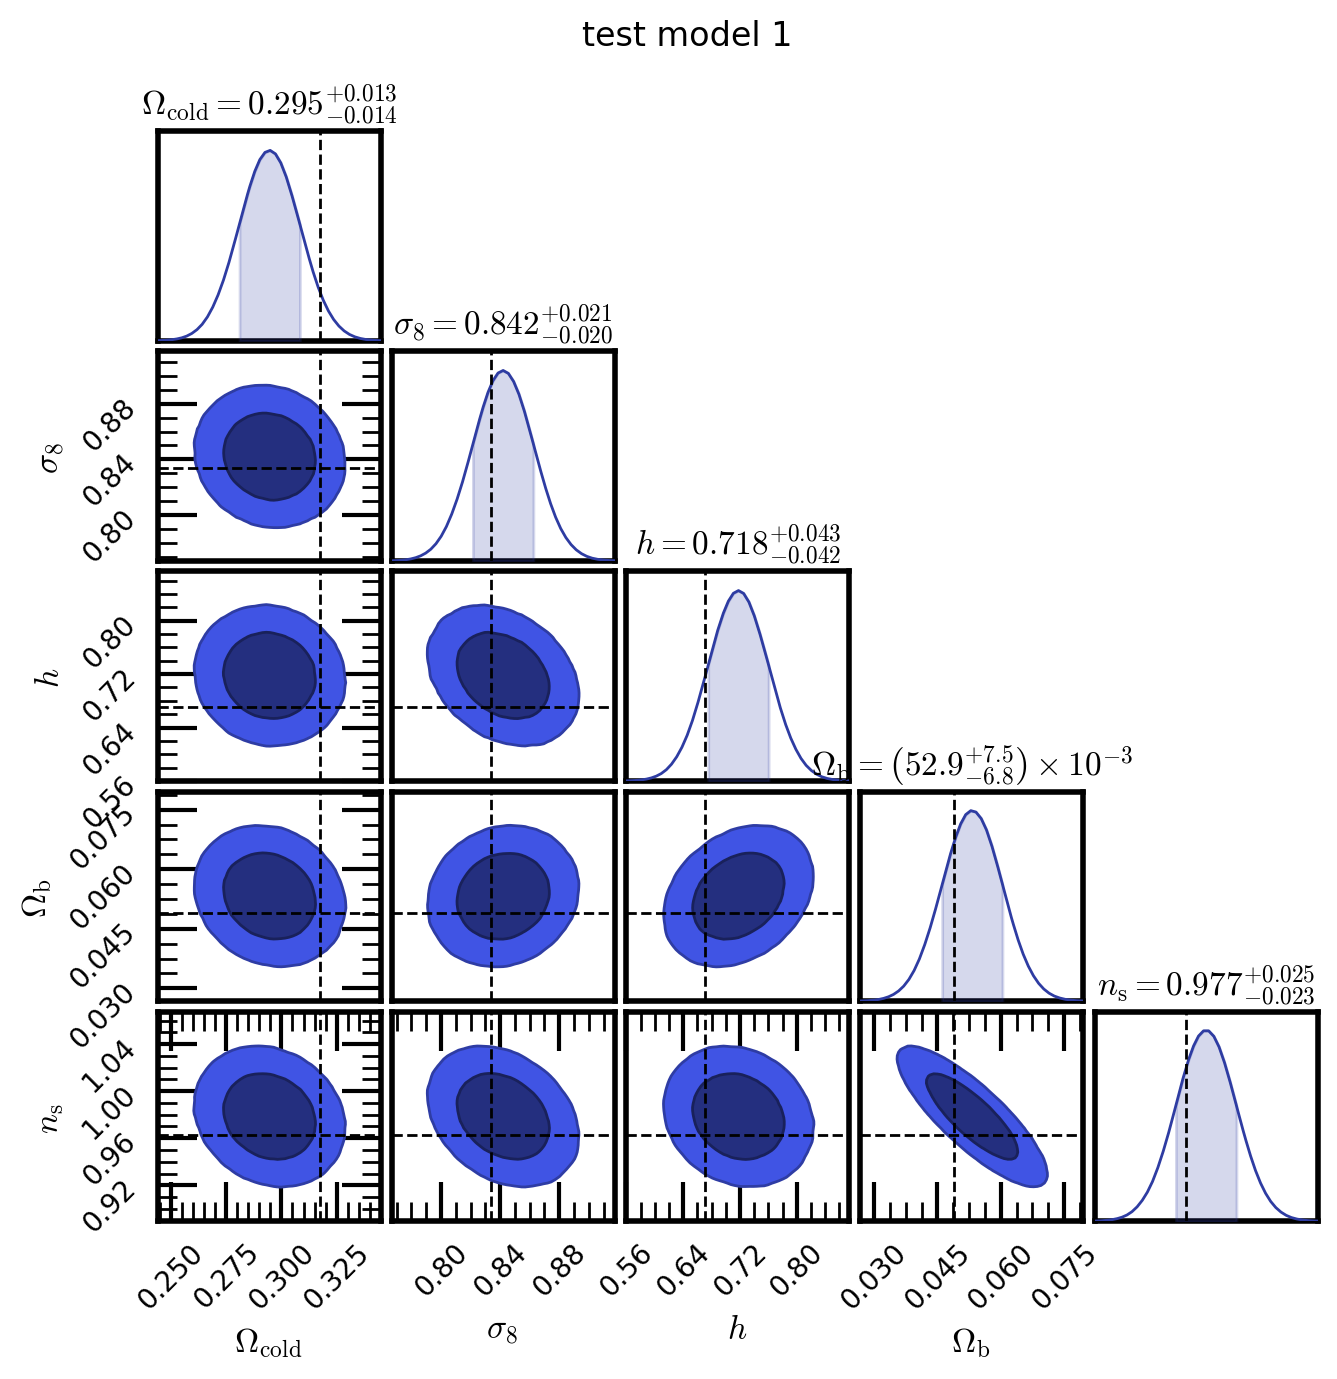

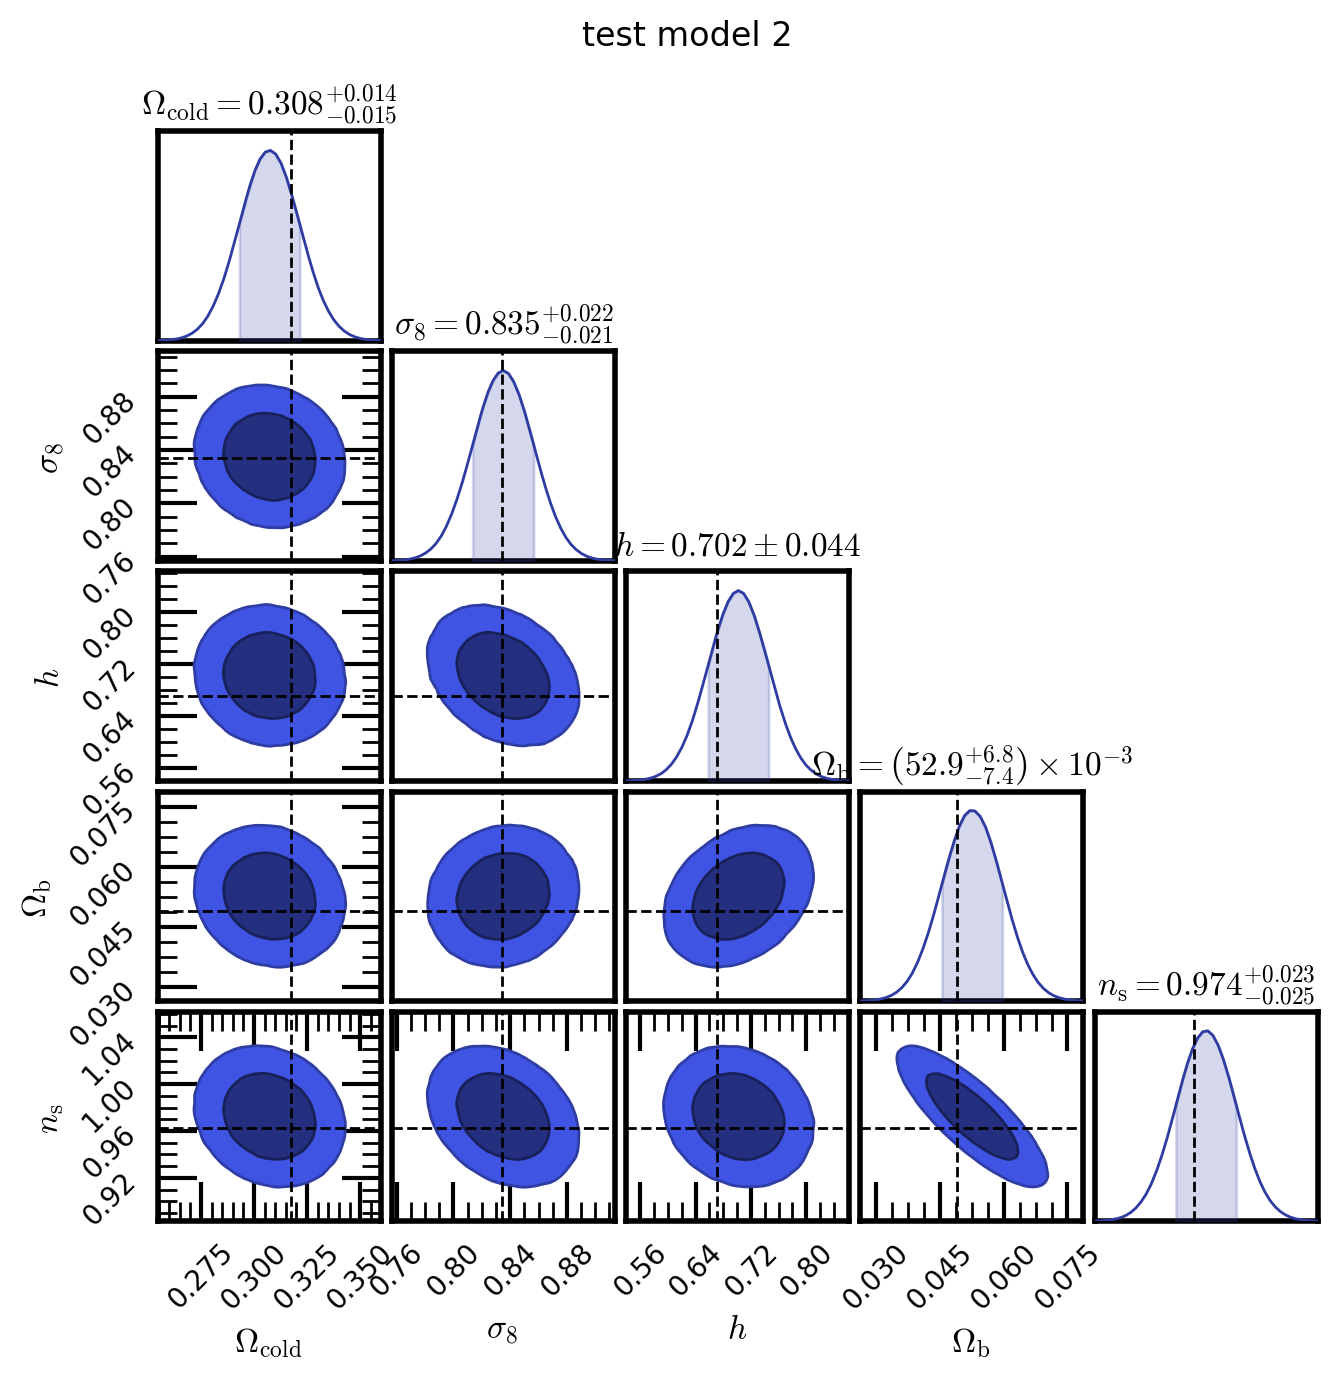

In [44]:
inf_methods = ['mn']
labels_extra = ['']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#2E3CA2']

for idx_obs in range(3):
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods, [tag_inf], tag_test='_fixedcosmo',
                            colors=colors, labels_extra=labels_extra)



## another model

In [9]:
### Load data
data_mode = 'muchisimocksPk'

tag_mocks_train = '_p5_n10000'
tag_pk_train = '_biaszen_p4_n10000'

tag_mocks = '_fixedcosmo'
tag_pk = '_biaszen_p4_n1000'
mode_bias_vector = 'LH'
#tag_pk = '_biaszen_p4_n10000'
#mode_bias_vector = 'LH'
tag_datagen = f'{tag_mocks_train}{tag_pk_train}'
tag_data = '_'+data_mode + tag_datagen


In [11]:
param_dict, Pk, gaussian_error_pk, k, bias_vector = rinf.load_data_muchisimocksPk_fixedcosmo(tag_mocks,
                                        tag_pk,
                                        mode_bias_vector=mode_bias_vector
                                        )
print(Pk.shape)

1000/1000 have at least one non-positive Pk value
Masking columns [29]
(1000, 29)


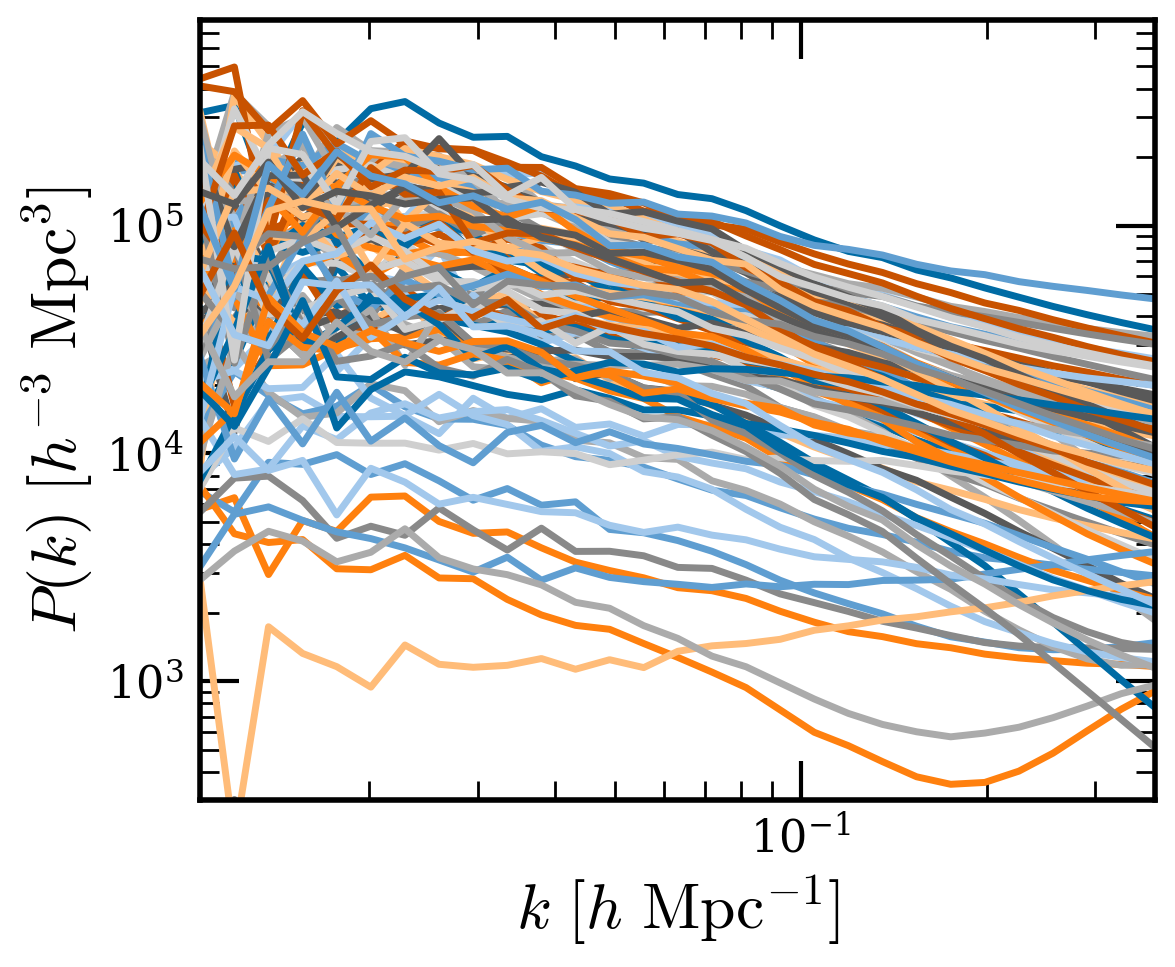

In [15]:
n_plot = 100
fig, ax = mpl.pyplot.subplots(figsize=(6, 5))
for iLH in range(n_plot):
    ax.loglog(k, Pk[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))
ax.set_ylim(3e2, 8e5)
mpl.pyplot.tight_layout()
mpl.pyplot.show()

# Compare models

In [ ]:
inf_methods = ['mn', 
               'mn',
               'mn']

tags_inf = [
    '_muchisimocksPk_p5_n10000_b1000_ntrain8000_direct_best-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p1_n10000_ntrain8000_direct_best-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain8000_direct_best-rand10',
            ]

labels_extra = ['(b1000)', 
                '(b1 only)',
                '(zennaro priors)', 
                ]

colors = ['cyan', 
          'orange',
          'red']

for idx_obs in range(3):
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods, tags_inf, 
                            colors=colors, labels_extra=labels_extra)



Covariance matrix not PSD! (sampling anyway)
Covariance matrix not PSD! (sampling anyway)
Covariance matrix not PSD! (sampling anyway)


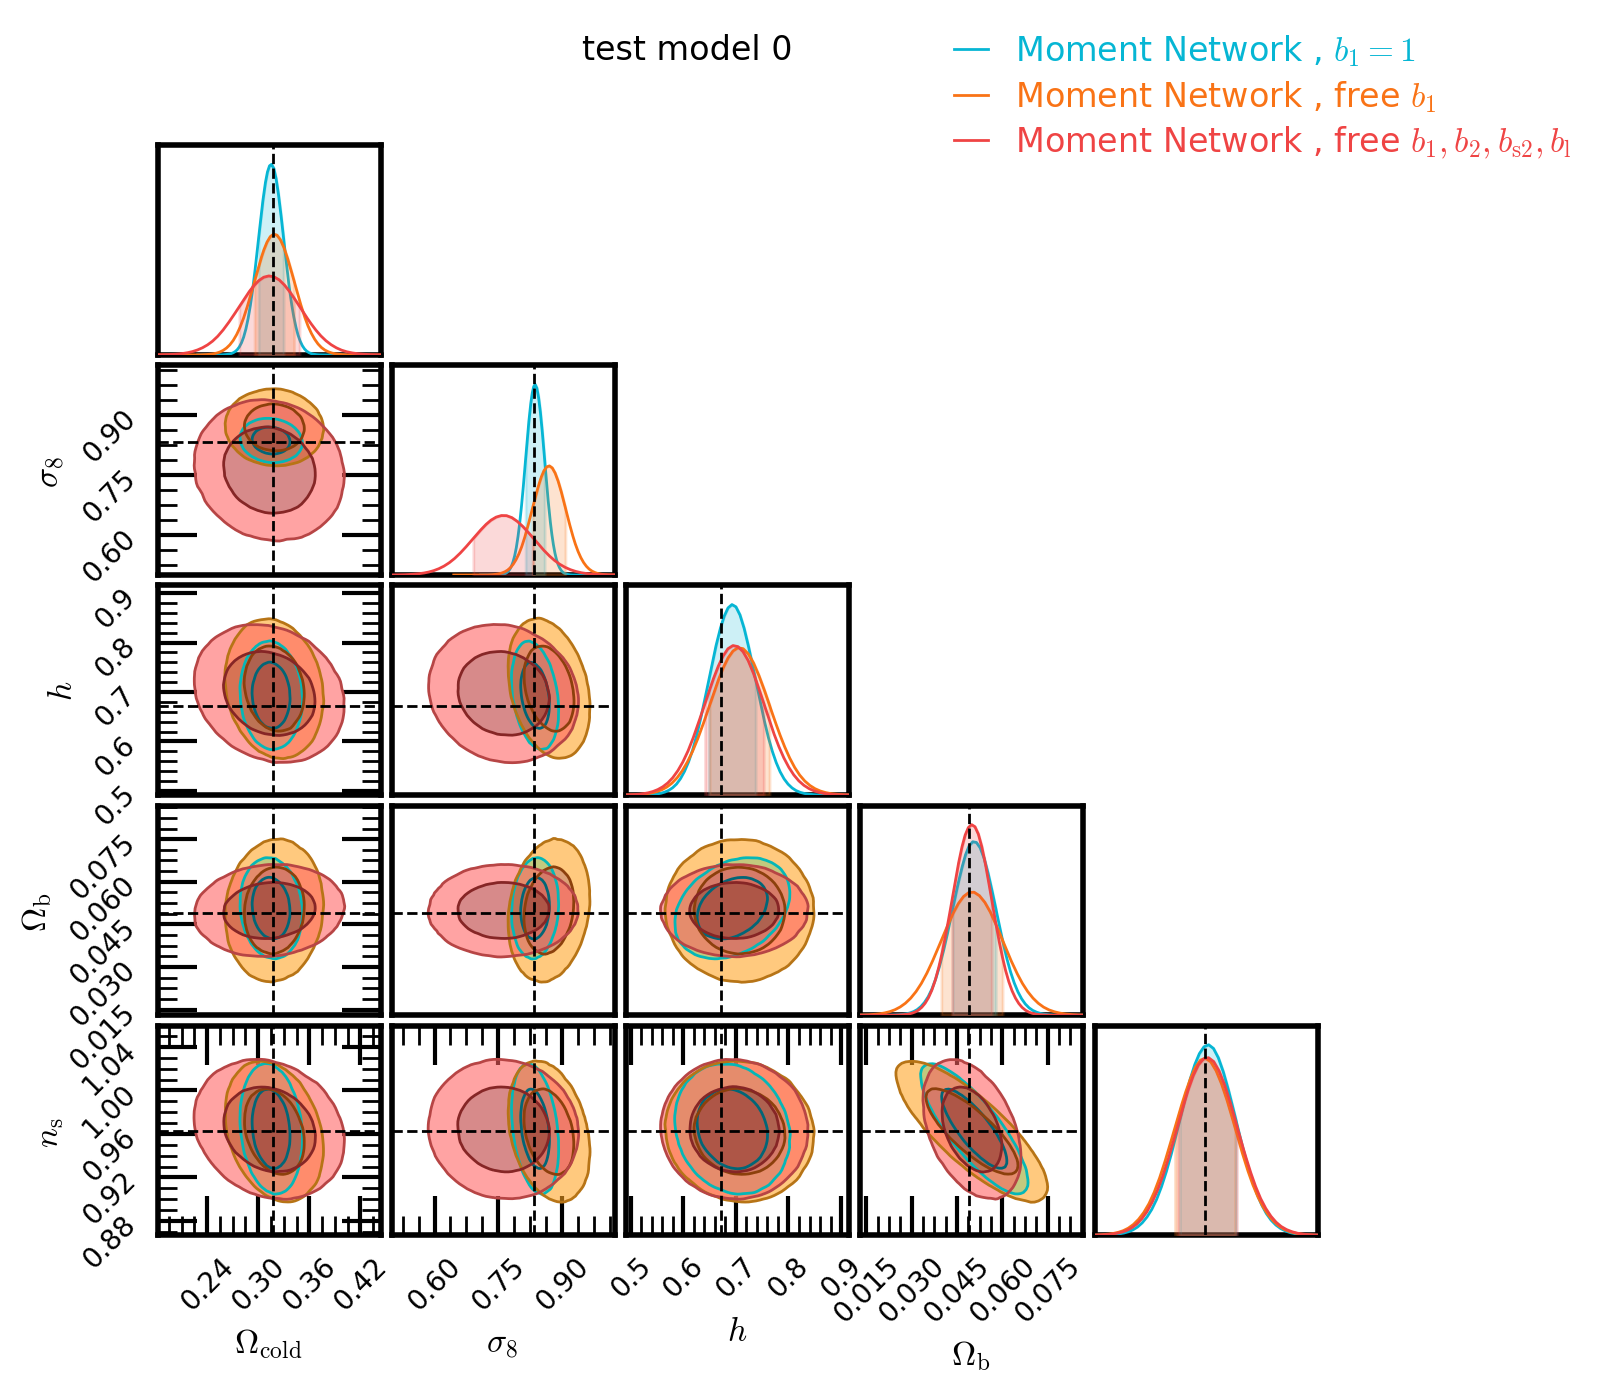

In [51]:
inf_methods = [
               'mn', 
               'mn',
               'mn'
               ]

tags_inf = [
    '_muchisimocksPk_p5_n10000_b1000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p1_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
            ]

labels_extra = [r', $b_1=1$', 
                r', free $b_1$',
                r', free $b_1, b_2, b_{\rm s2}, b_{\rm l}$',
                ]

colors = ['cyan', 
          'orange',
          'red'
          ]

import generate_params_lh as gplh
param_names_ordered, bounds_dict, fiducial_dict = gplh.define_LH_cosmo()

idx_obs = 0
# the below line for making the build for slides
#for i in range(len(tags_inf)):
for i in [len(tags_inf)]:
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods[:i+1], tags_inf[:i+1], tag_test='_fixedcosmo_mean',
                            colors=colors[:i+1], labels_extra=labels_extra[:i+1],
                            #extents=bounds_dict
                            )




Covariance matrix not PSD! (sampling anyway)
Covariance matrix not PSD! (sampling anyway)
Covariance matrix not PSD! (sampling anyway)


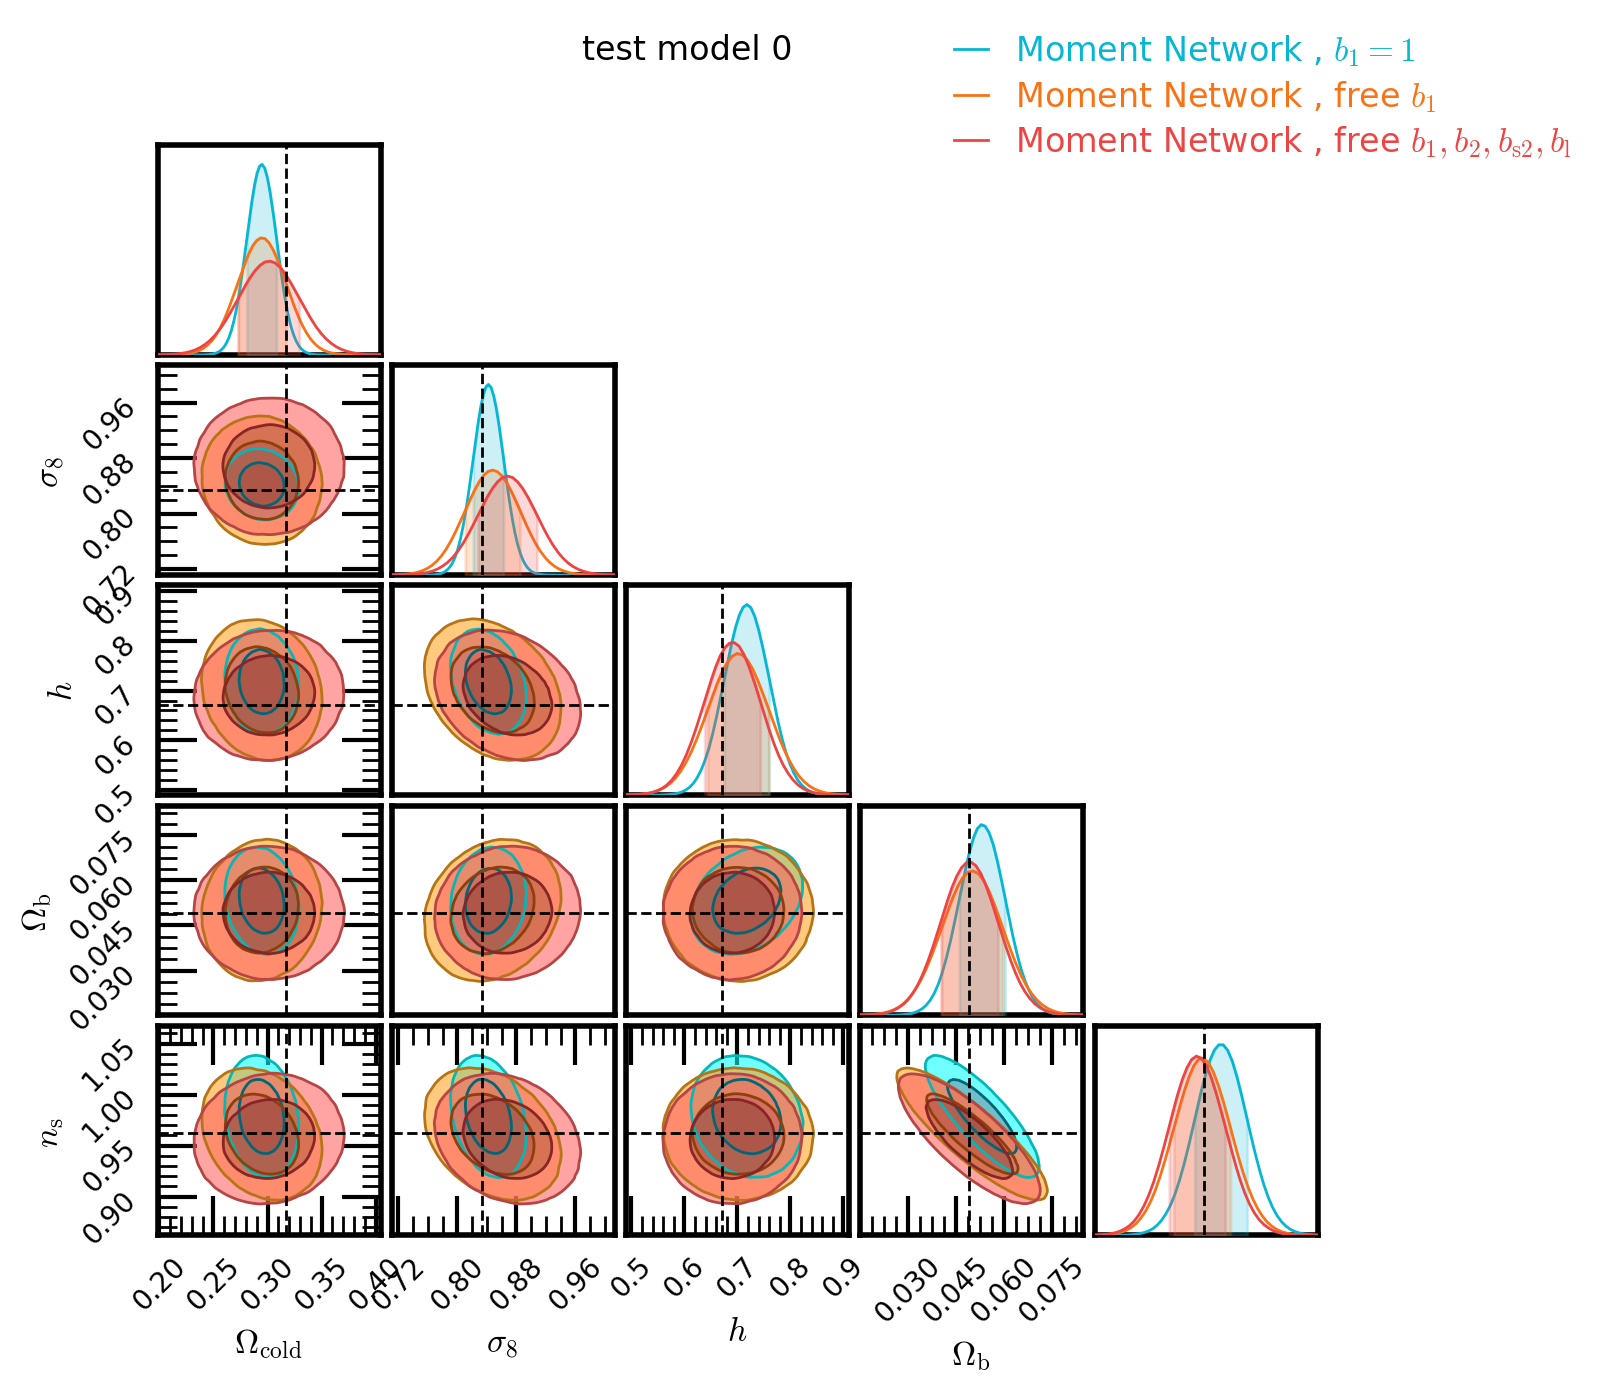

In [52]:
inf_methods = [
               'mn', 
               'mn',
               'mn'
               ]

tags_inf = [
    '_muchisimocksPk_p5_n10000_b1000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p1_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
            ]

labels_extra = [r', $b_1=1$', 
                r', free $b_1$',
                r', free $b_1, b_2, b_{\rm s2}, b_{\rm l}$',
                ]

colors = ['cyan', 
          'orange',
          'red'
          ]

import generate_params_lh as gplh
param_names_ordered, bounds_dict, fiducial_dict = gplh.define_LH_cosmo()

idx_obs = 0
# the below line for making the build for slides
#for i in range(len(tags_inf)):
for i in [len(tags_inf)]:
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods[:i+1], tags_inf[:i+1], tag_test='_fixedcosmo',
                            colors=colors[:i+1], labels_extra=labels_extra[:i+1],
                            #extents=bounds_dict
                            )




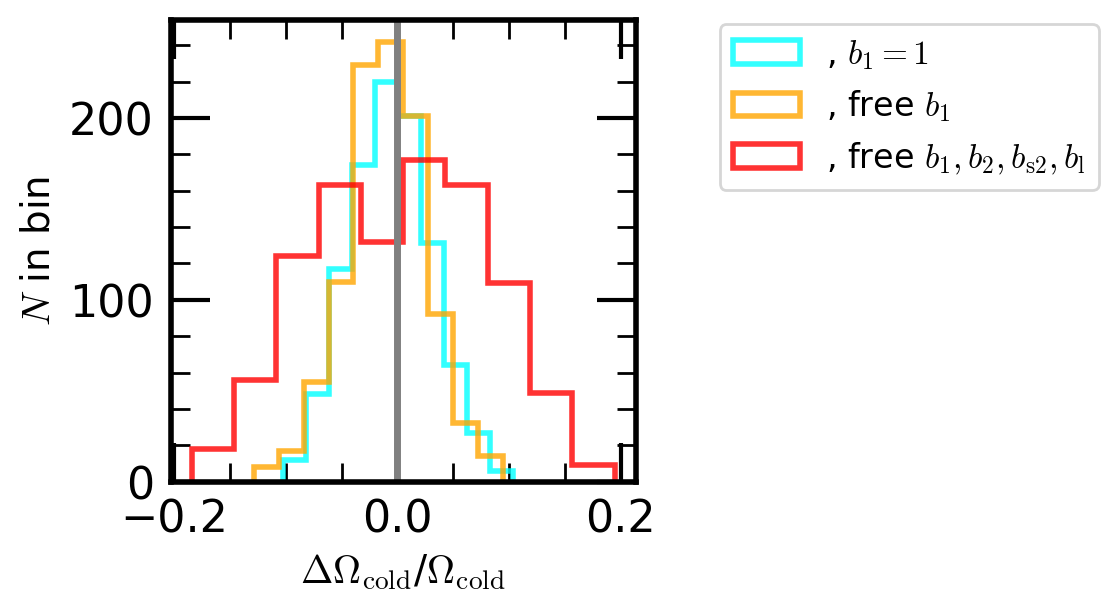

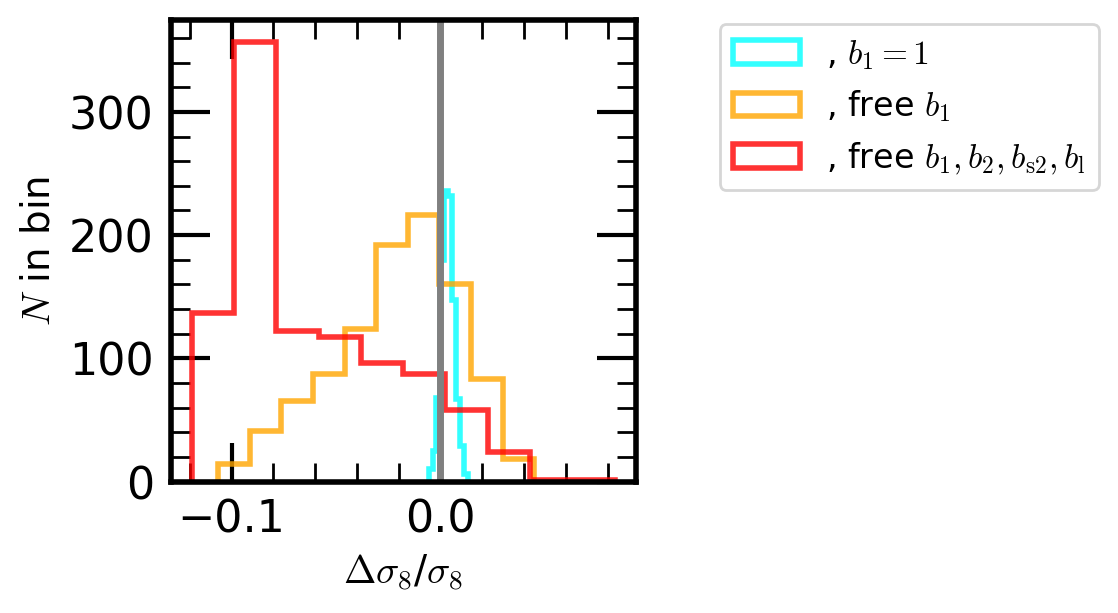

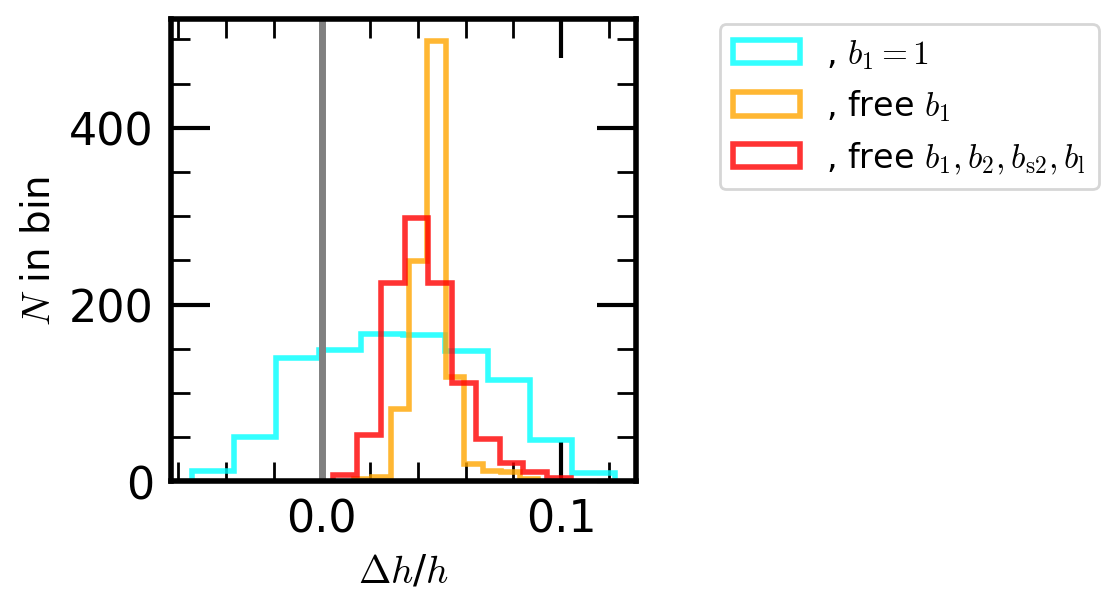

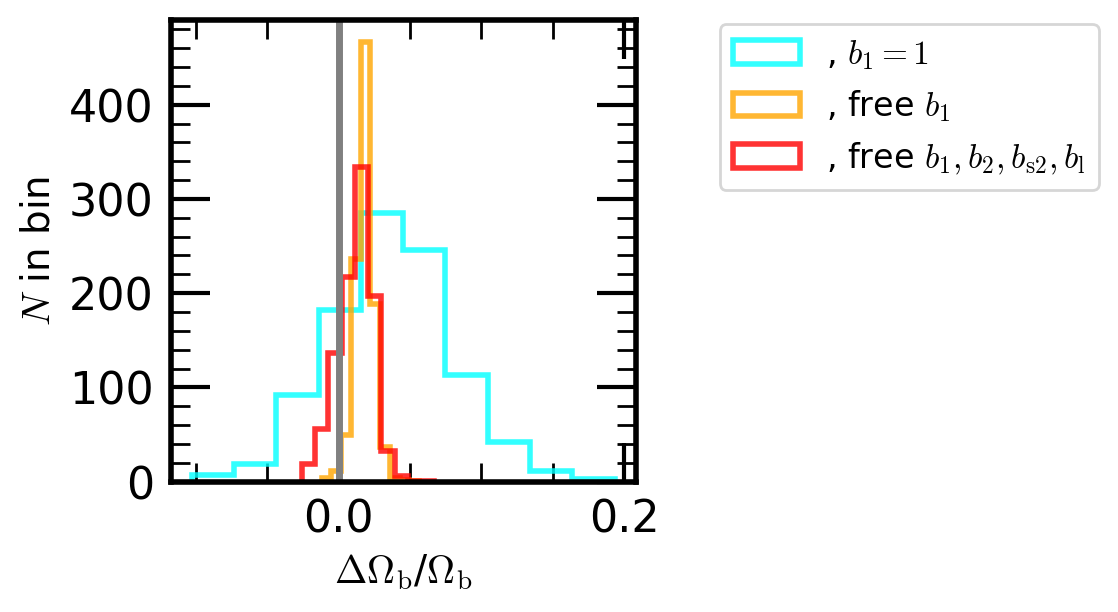

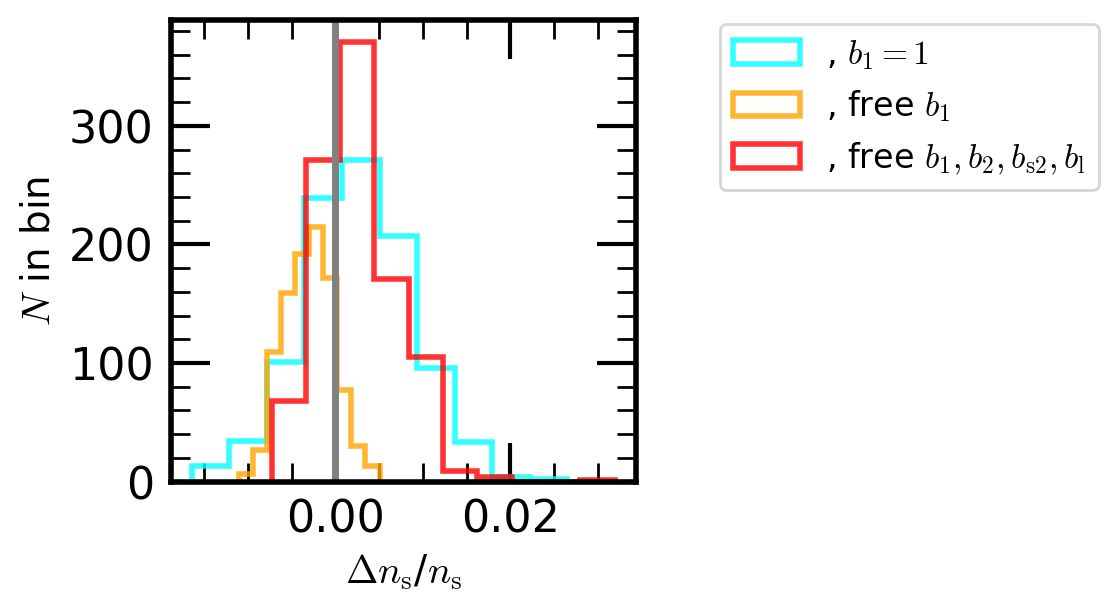

In [55]:
inf_methods = [
               'mn', 
               'mn',
               'mn'
               ]

tags_inf = [
    '_muchisimocksPk_p5_n10000_b1000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p1_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
            ]

labels_extra = [r', $b_1=1$', 
                r', free $b_1$',
                r', free $b_1, b_2, b_{\rm s2}, b_{\rm l}$',
                ]

colors = ['cyan', 
          'orange',
          'red'
          ]


fracdiffs_arr = []
for tag_inf in tags_inf:
    _theta_test_pred, _  = utils.get_moments_test_mn(tag_inf, tag_test='_fixedcosmo')
    fracdiffs_mn = (_theta_test_pred - theta_test)/theta_test
    fracdiffs_arr.append(fracdiffs_mn)
fracdiffs_arr = np.array(fracdiffs_arr)

plotter.plot_hists_mean(fracdiffs_arr, param_labels, 
                        color_arr=colors, label_arr=labels_extra,
                        bins=10, alpha=0.8, histtype='step')


/dipc/kstoreyf/muchisimocks/scripts/plotter.py:94: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(np.diag(cov_pred))


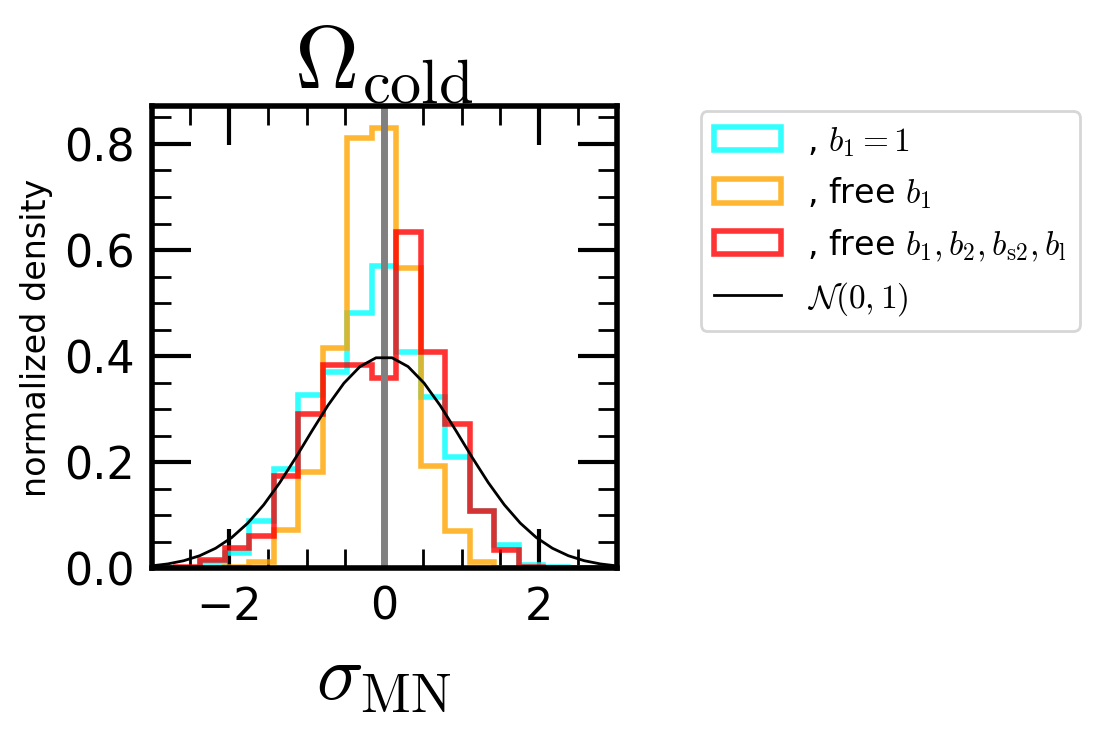

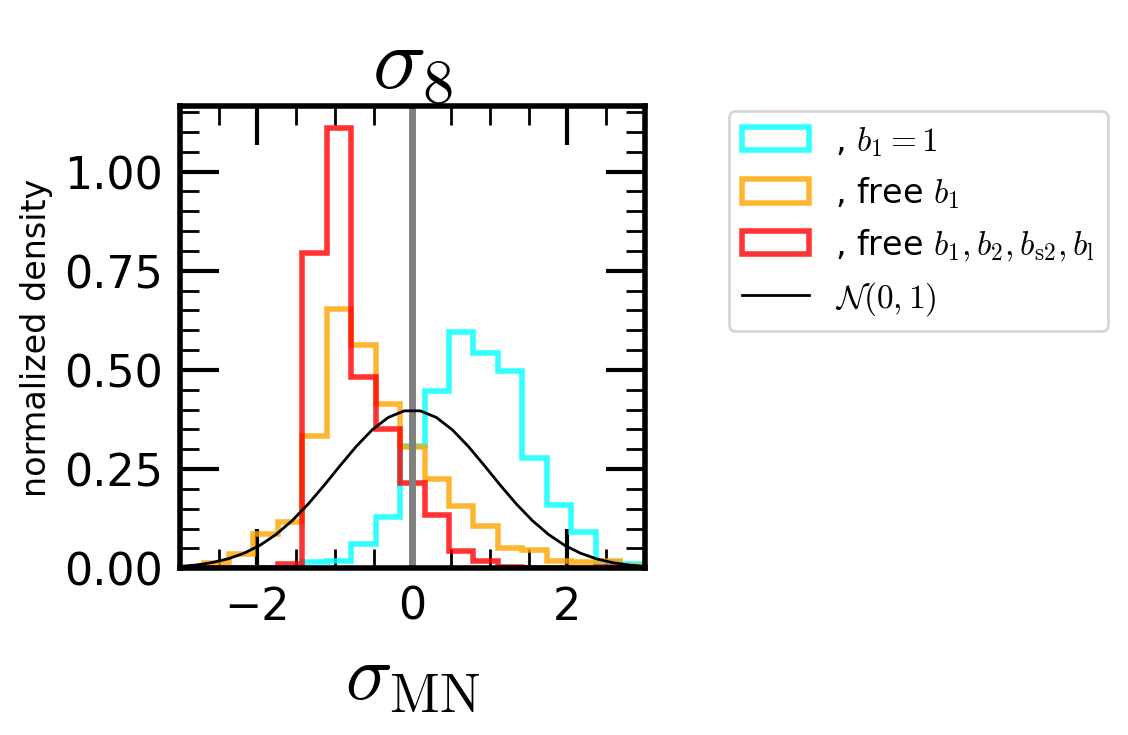

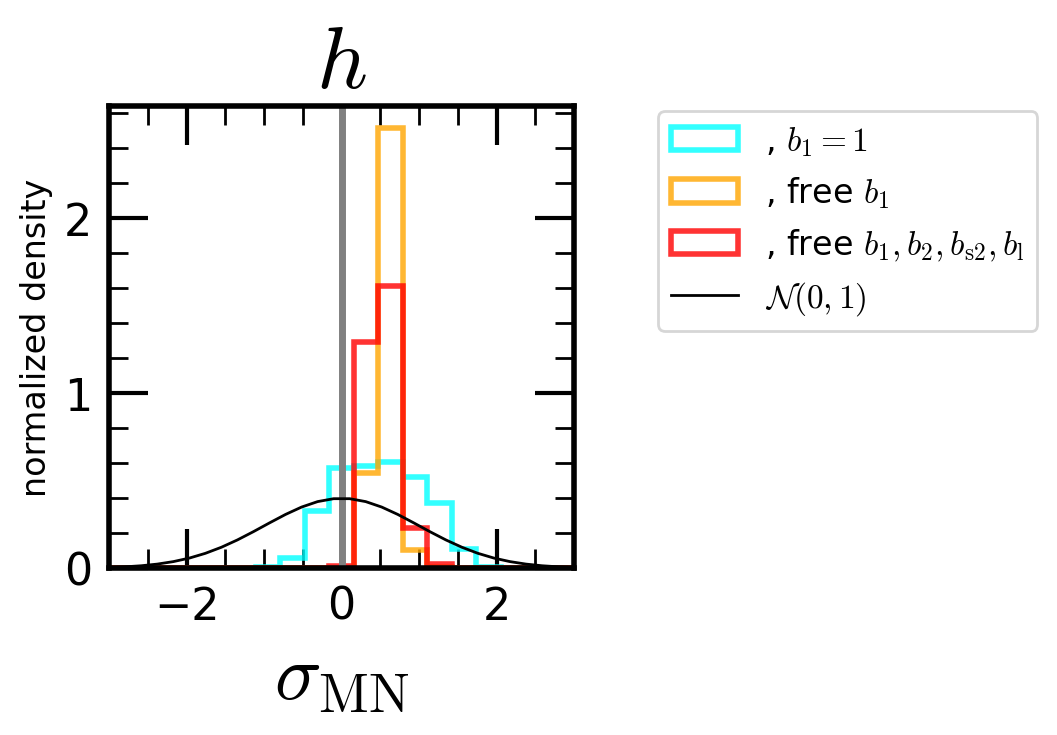

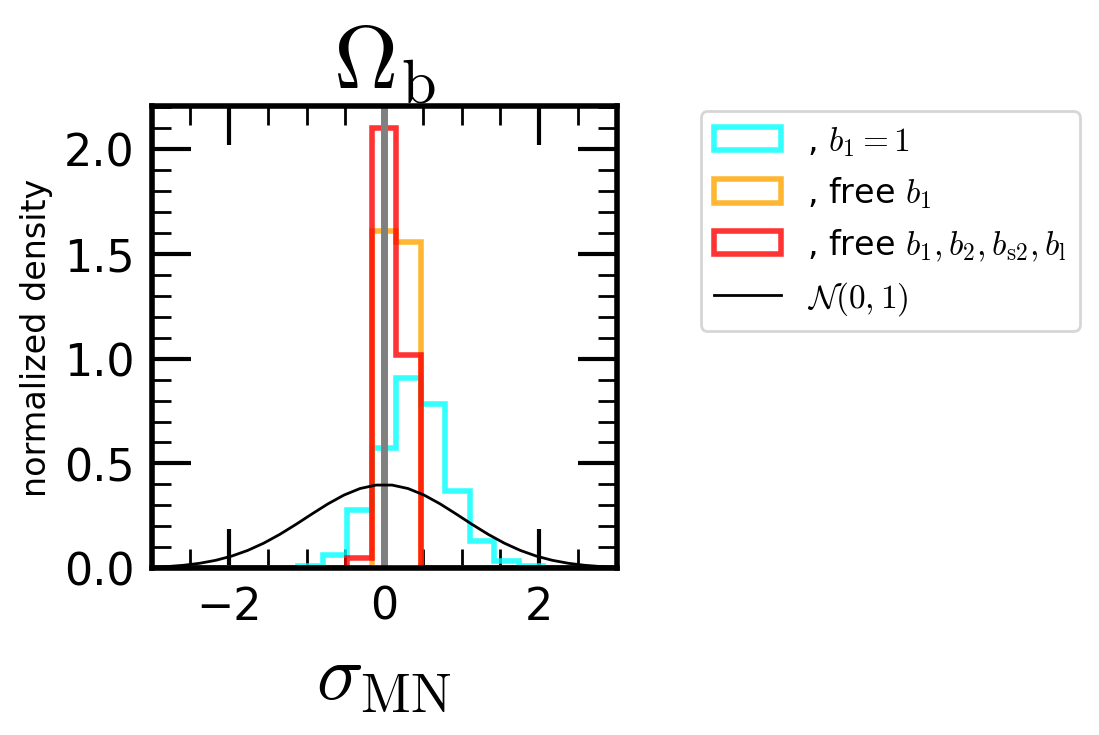

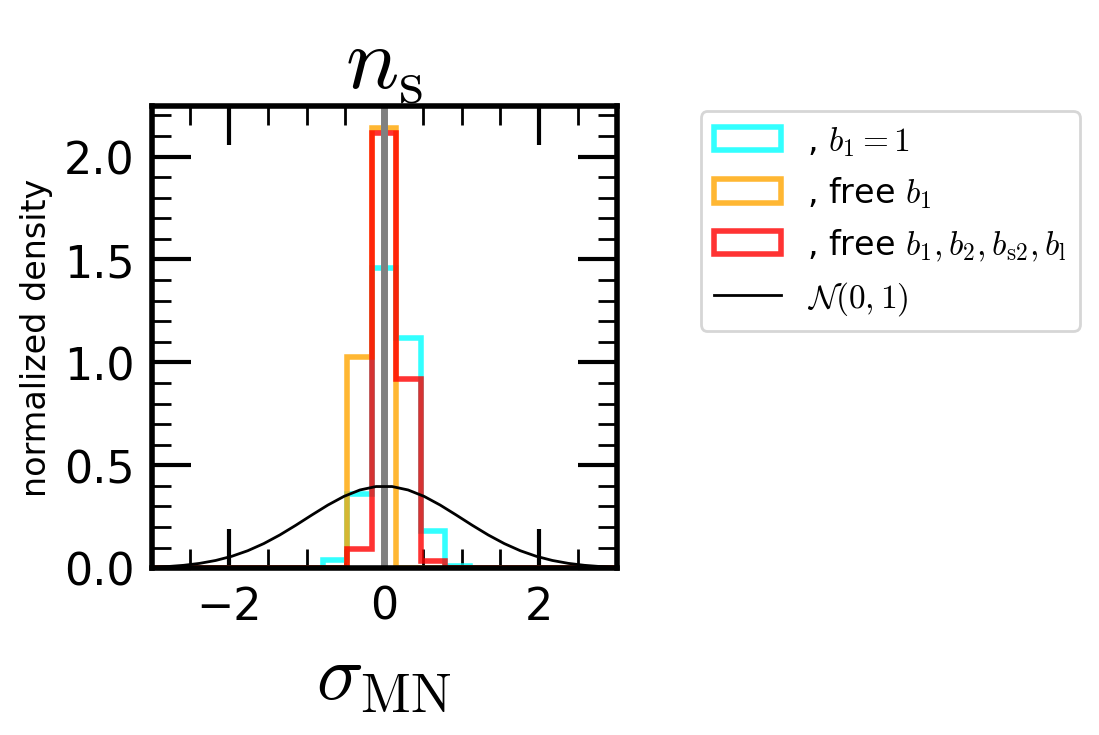

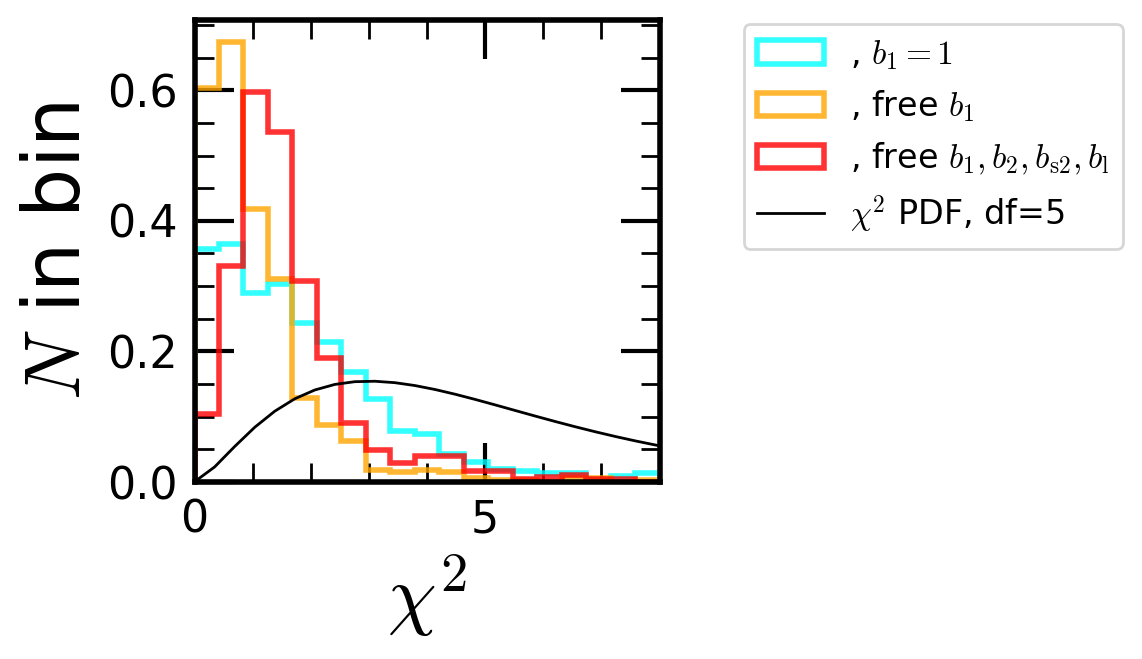

In [56]:
inf_methods = [
               'mn', 
               'mn',
               'mn'
               ]

tags_inf = [
    '_muchisimocksPk_p5_n10000_b1000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p1_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
    '_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain8000_direct_best-rand10_bestcov-rand10',
            ]

labels_extra = [r', $b_1=1$', 
                r', free $b_1$',
                r', free $b_1, b_2, b_{\rm s2}, b_{\rm l}$',
                ]

colors = ['cyan', 
          'orange',
          'red'
          ]


theta_true_arr, theta_pred_arr, covs_pred_arr = [], [], []
for tag_inf in tags_inf:
    _theta_test_pred, _covs_test_pred  = utils.get_moments_test_mn(tag_inf, tag_test='_fixedcosmo')
    theta_true_arr.append(theta_test)
    theta_pred_arr.append(_theta_test_pred)
    covs_pred_arr.append(_covs_test_pred)
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
covs_pred_arr = np.array(covs_pred_arr)

plotter.plot_hists_cov(theta_true_arr, theta_pred_arr, covs_pred_arr, param_labels,
                        color_arr=colors, label_arr=labels_extra,
                        #bins=10, 
                        alpha=0.8, histtype='step')
